<a href="https://colab.research.google.com/github/marcostark/machine-learning/blob/master/python/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mlxtend

     |████████████████████████████████| 1.3MB 394kB/s eta 0:00:01


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from time import time
%matplotlib inline

In [0]:
#eta: Taxa de aprendizagem
#epochs: Numero de passos a serem executados
# Apenas um comentario

class Perceptron(object):
    def __init__(self, eta=0.01, epoch = 50):
        self.eta = eta
        self.epoch = epoch
        
    def train(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []
        
        for _ in range(self.epoch):
            errors = 0
            for xi, target in zip(x,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [0]:
#dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [0]:
# Dados das duas classes
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa',-1, 1)
X = df.iloc[0:100, [0,2]].values

In [0]:
# Criando o modelo de treinamento
model = Perceptron(epoch=500, eta = 0.1)

In [9]:
model.train(X,y)

Pesos: [-0.4  -0.68  1.82]


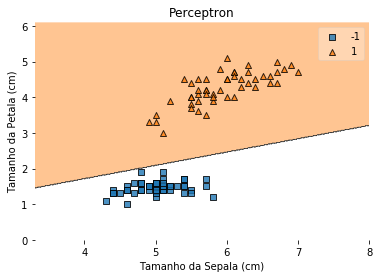

<function matplotlib.pyplot.show>

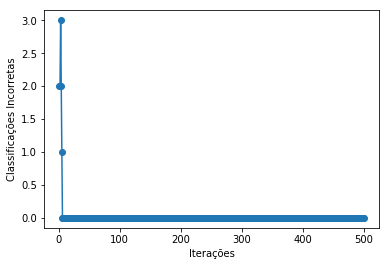

In [10]:
#Platando

print('Pesos: %s' % model.w_)
plot_decision_regions(X, y, clf = model)
plt.title('Perceptron')
plt.xlabel('Tamanho da Sepala (cm)')
plt.ylabel('Tamanho da Petala (cm)')
plt.show()

plt.plot(range(1, len(model.errors_)+1), model.errors_, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Classificações Incorretas')
plt.show